### News Scrapping

In [1]:
from requests_html import HTMLSession,PyQuery as pq
session=HTMLSession()
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import json

In [2]:
sid.polarity_scores('At least nine people were killed in the first strike when missiles destroyed a moving vehicle in the North Waziristan tribal region, the officials said.')

{'neg': 0.305, 'neu': 0.695, 'pos': 0.0, 'compound': -0.8481}

In [3]:
start_date=datetime(2019,3,13)
end_date=datetime.now().date()
dt=timedelta(days=1)
for i in np.arange(start_date,end_date,dt).astype(datetime):
    print(type(str(i.date())))
    break

<class 'str'>


In [4]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
from datetime import datetime, timedelta
import time,urllib.error
import pprint

date_sentiments = {}
flag = False
for i in range(1,11):
    page = urlopen('https://www.businesstimes.com.sg/search/apple?page='+str(i)).read()
    soup = BeautifulSoup(page, features="html.parser")
    posts = soup.findAll("div", {"class": "media-body"})
    i = 0
    if flag == True:
            break
    for post in posts:
        #print(post.pubdate)
        i+=1
        print("----------------------------------",i,"-----------------------")       
        time.sleep(1)
        url = post.a['href']
        date = post.time.text
        if date == '13 Mar 2019':
            flag = True
            break
        print(date,url)
        try:
            link_page = urlopen(url).read()
            #print(link_page)
        except urllib.error.URLError as e:
            if hasattr(e,'code'):
                print (e.code)
            if hasattr(e,'reason'):
                print (e.reason)
        except urllib.error.URLError as e:
            if hasattr(e,'code'):
                print(e.code)
            if hasattr(e,'reason'):
                print(e.reason)
                print('HTTPError!!!')
            else:            
                url = url[:-2]
                link_page = urlopen(url).read()
        
        
        link_soup = BeautifulSoup(link_page)
        #print(link_soup)
        #print(link_soup.find('article:published_time'))
        sentences = link_soup.findAll("p")
        passage = ""
        for sentence in sentences:
            passage += sentence.text
        sentiment = sid.polarity_scores(passage)['compound']
        #sentiment = sid.polarity_scores(passage)
        date_sentiments.setdefault(date, []).append(sentiment)
        #print(date_sentiments)
    

date_sentiment = {}

for k,v in date_sentiments.items():
    date_sentiment[datetime.strptime(k, '%d %b %Y').date() + timedelta(days=1)] = round(sum(v)/float(len(v)),3)

earliest_date = min(date_sentiment.keys())

print(date_sentiment)


---------------------------------- 1 -----------------------
22 Apr 2019 https://www.businesstimes.com.sg/technology/apple-slammed-qualcomm-in-public-but-praised-it-in-private
---------------------------------- 2 -----------------------
18 Apr 2019 https://www.businesstimes.com.sg/technology/apple%E2%80%99s-legal-surrender-is-a-blow-for-its-supply-chain-strategy
---------------------------------- 3 -----------------------
18 Apr 2019 https://www.businesstimes.com.sg/technology/apple-and-qualcomm-settle-all-disputes-worldwide
---------------------------------- 4 -----------------------
17 Apr 2019 https://www.businesstimes.com.sg/technology/tiktok-vanishes-from-google-apple-app-stores-in-india-after-ban
---------------------------------- 5 -----------------------
17 Apr 2019 https://www.businesstimes.com.sg/technology/apple-puts-need-for-5g-ahead-of-legal-fight-in-qualcomm-deal
---------------------------------- 6 -----------------------
17 Apr 2019 https://www.businesstimes.com.sg/tech

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [6]:
df = pd.read_csv('first_csv_Copy.csv',encoding='utf-8')
df.head()

,symbol,name,currency,price,price_open,day_high,day_low,52_week_high,52_week_low,day_change,...,market_cap,volume,volume_avg,shares,stock_exchange_long,stock_exchange_short,timezone,timezone_name,gmt_offset,last_trade_time
0,ADBE,Adobe Inc,USD,257.82,255.98,258.79,255.77,277.61,204.95,3.08,...,1.258835e+11,364861.0,2713470.0,489115000.0,NASDAQ Stock Exchange,NASDAQ,EDT,America/New_York,-14400.0,2019-03-11 10:32:27
1,ALL,Allstate Corp,USD,93.96,93.55,93.96,93.39,102.73,77.00,0.66,...,3.115474e+10,172407.0,2159718.0,331963000.0,New York Stock Exchange,NYSE,EDT,America/New_York,-14400.0,2019-03-11 10:40:49
2,AMZN,"Amazon.com, Inc.",USD,1643.50,1626.12,1647.69,1626.01,2050.50,1307.00,22.70,...,8.084124e+11,900918.0,4683502.0,491203000.0,NASDAQ Stock Exchange,NASDAQ,EDT,America/New_York,-14400.0,2019-03-11 10:38:04
3,AXP,American Express Company,USD,109.27,109.01,109.30,108.71,114.55,89.05,1.29,...,9.226453e+10,367722.0,3110326.0,843369000.0,New York Stock Exchange,NYSE,EDT,America/New_York,-14400.0,2019-03-11 10:32:53
4,MMM,3M Co,USD,204.62,201.88,204.95,201.66,243.10,176.87,3.69,...,1.178202e+11,365569.0,2184449.0,575800000.0,New York Stock Exchange,NYSE,EDT,America/New_York,-14400.0,2019-03-11 10:32:56


In [7]:
'''
unique = df.name.unique()
print(unique)
#np.delete(unique,np.where(unique='Amazon.com, Inc.'))
for i in range(len(unique)):
    plt.plot(df[df.name==unique[i]].price,label = unique[i])
    plt.show()
'''

"\nunique = df.name.unique()\nprint(unique)\n#np.delete(unique,np.where(unique='Amazon.com, Inc.'))\nfor i in range(len(unique)):\n    plt.plot(df[df.name==unique[i]].price,label = unique[i])\n    plt.show()\n"

In [8]:
df['Dates'] = pd.to_datetime(df['last_trade_time']).dt.date
df['Time'] = pd.to_datetime(df['last_trade_time']).dt.time


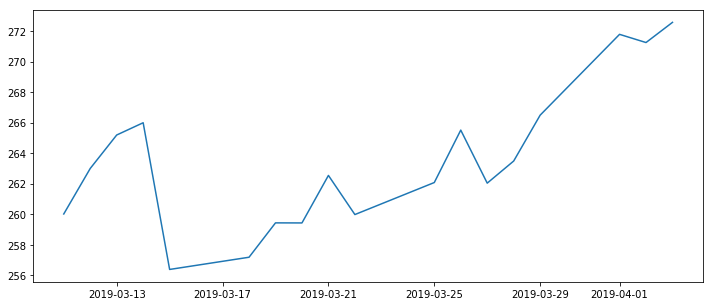

,price,price_open,day_high,day_low,volume,Sentiment_Score
Dates,,,,,,
2019-03-15,256.388286,258.030000,259.915571,252.082714,1.018336e+07,-0.009
2019-03-20,259.433333,260.540000,261.748000,256.704857,2.100867e+06,-0.447
2019-03-21,262.543889,259.000000,262.932778,258.400000,1.267011e+06,0.892
2019-03-26,265.510488,265.050000,267.710625,263.840000,1.824826e+06,0.987
2019-03-27,262.039032,265.530000,265.970000,259.741935,1.461412e+06,0.979
2019-03-28,263.487059,263.500000,265.170000,260.880000,1.604189e+06,0.655
2019-03-29,266.490000,265.470000,266.750000,264.200000,2.097589e+06,-0.939
2019-04-02,271.244630,272.862222,272.969259,267.725185,1.425106e+06,-0.426
2019-04-03,272.566154,273.710000,274.180000,270.980000,1.219681e+06,0.581


In [9]:
################################## Apple ###########################
'''df_apple = df[df['name']=='Apple Inc.']
#df_apple.head()
df_apple.shape
df_apple = df_apple.groupby('Dates').mean()
plt.figure(figsize=(12,5))
plt.plot(df_apple.price)
plt.show()
#print(date_sentiment)
ds = pd.DataFrame.from_dict(date_sentiment,orient='index',columns=['Sentiment_Score'])
ds.index.names = ['Dates']
#print(df_apple.head)
#ds
df_apple = pd.merge(df_apple, ds, on='Dates')
df_apple.head()
df_apple.drop(['52_week_high', '52_week_low', 'day_change','change_pct','close_yesterday','market_cap','volume_avg','gmt_offset','shares'], axis=1)
'''
################################## Adobe Inc ###########################
df_apple = df[df['name']=='Adobe Inc']
#df_apple.head()
df_apple.shape
df_apple = df_apple.groupby('Dates').mean()
plt.figure(figsize=(12,5))
plt.plot(df_apple.price)
plt.show()
#print(date_sentiment)
ds = pd.DataFrame.from_dict(date_sentiment,orient='index',columns=['Sentiment_Score'])
ds.index.names = ['Dates']
#print(df_apple.head)
#ds
df_apple = pd.merge(df_apple, ds, on='Dates')
df_apple.head()
df_apple.drop(['52_week_high', '52_week_low', 'day_change','change_pct','close_yesterday','market_cap','volume_avg','gmt_offset','shares'], axis=1)

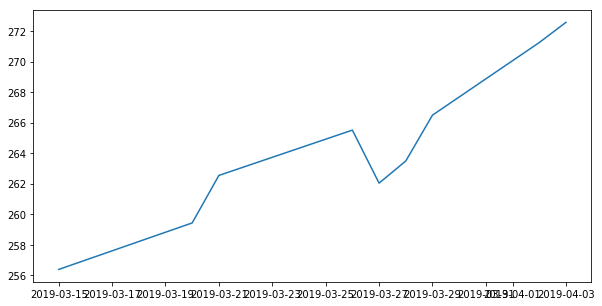

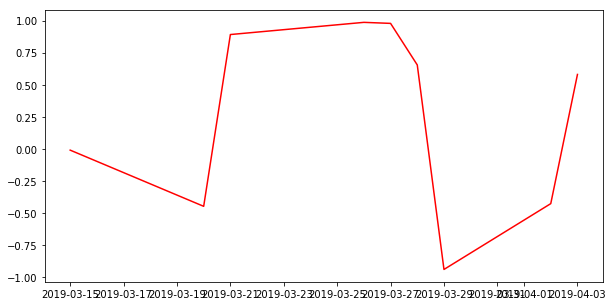

In [10]:
plt.figure(figsize=(10,5))
plt.plot(df_apple.price)
plt.show()
plt.figure(figsize=(10,5))
plt.plot(df_apple.Sentiment_Score,color='red')
plt.show()